To tackle the problem of predicting and mitigating customer churn at Chase Bank effectively, you can follow these structured steps:

1. **Data Preparation and Exploration:**
   - **Clean the Data:** Handle missing values, outliers, and incorrect entries.
   - **Explore the Data:** Use statistical summaries and visualizations to understand the distribution and relationships of the variables.

2. **Feature Engineering:**
   - **Create New Features:** Derive new variables from existing data that might better explain customer churn, such as interaction terms or customer value scores.
   - **Select Relevant Features:** Identify the most relevant features that contribute to churn using techniques like correlation analysis and feature importance metrics.

3. **Data Splitting:**
   - **Partition the Data:** Split the data into training, validation, and test sets to ensure model robustness and prevent overfitting.

4. **Model Development:**
   - **Choose Models:** Select appropriate predictive modeling techniques (e.g., logistic regression, random forests, gradient boosting machines).
   - **Train Models:** Develop models on the training set with the selected algorithms.
   - **Hyperparameter Tuning:** Optimize model parameters using cross-validation on the validation set.

5. **Model Evaluation:**
   - **Assess Model Performance:** Evaluate the models using appropriate metrics (e.g., accuracy, ROC-AUC, precision, recall) on the validation set.
   - **Model Selection:** Choose the best-performing model based on evaluation metrics.

6. **Implementation and Testing:**
   - **Test the Model:** Assess the final model on a separate test set to evaluate its performance in a simulated real-world scenario.
   - **Feature Importance Analysis:** Identify and report the most influential factors driving customer churn.

7. **Strategy Development for Retention:**
   - **Insight Extraction:** Use model outputs to derive insights into customer behavior and churn drivers.
   - **Develop Retention Strategies:** Propose targeted actions to mitigate churn, such as personalized offers, improved customer service, or loyalty programs.

8. **Presentation of Findings:**
   - **Prepare Presentation Materials:** Develop slides and visual aids to clearly communicate the problem, methodology, findings, and recommendations.
   - **Practice the Presentation:** Rehearse the delivery to ensure clarity and impact during the panel interview.

9. **Implementation and Monitoring:**
   - **Deploy Strategies:** Implement the proposed retention strategies.
   - **Monitor Performance:** Regularly track the effectiveness of implemented strategies and make adjustments as necessary based on performance data and evolving customer needs.

10. **Feedback Loop:**
    - **Gather Feedback:** Continuously collect and analyze customer feedback to further refine strategies and model predictions.
    - **Iterative Improvement:** Update models and strategies periodically based on new data and insights to maintain relevance and effectiveness.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
df = pd.read_csv('./Data_Churn_Modeling.csv')
# Display the first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# Handling missing values if any - you might decide to fill them with the median or mode
# For numerical columns use median
for column in ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']:
    if df[column].isnull().sum() > 0:
        df[column]= df[column].fillna(df[column].median())

# For categorical columns use mode
for column in ['Geography', 'Gender']:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna(df[column].mode()[0])

In [8]:
# Data types check
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


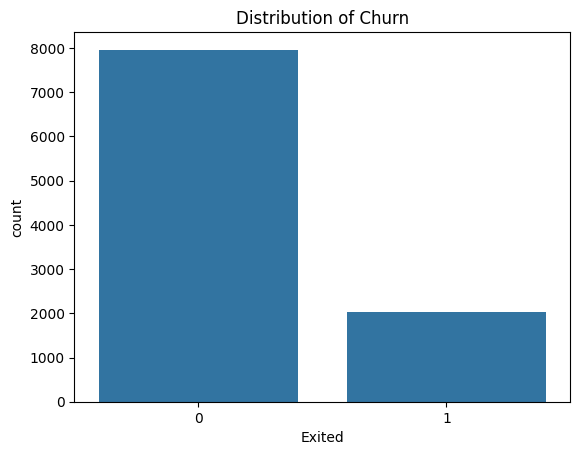

In [9]:
# Visualization of target variable distribution
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn')
plt.show()

In [10]:
# Basic statistics
print("Basic Statistical Details:")
print(df.describe())

Basic Statistical Details:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.497300     38.943500      5.015400   
std     2886.89568  7.193619e+04     96.694095     10.613726      2.902931   
min        1.00000  1.556570e+07    305.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    717.250000     44.000000      7.250000   
max    10000.00000  1.581569e+07    865.000000    190.000000     30.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797  

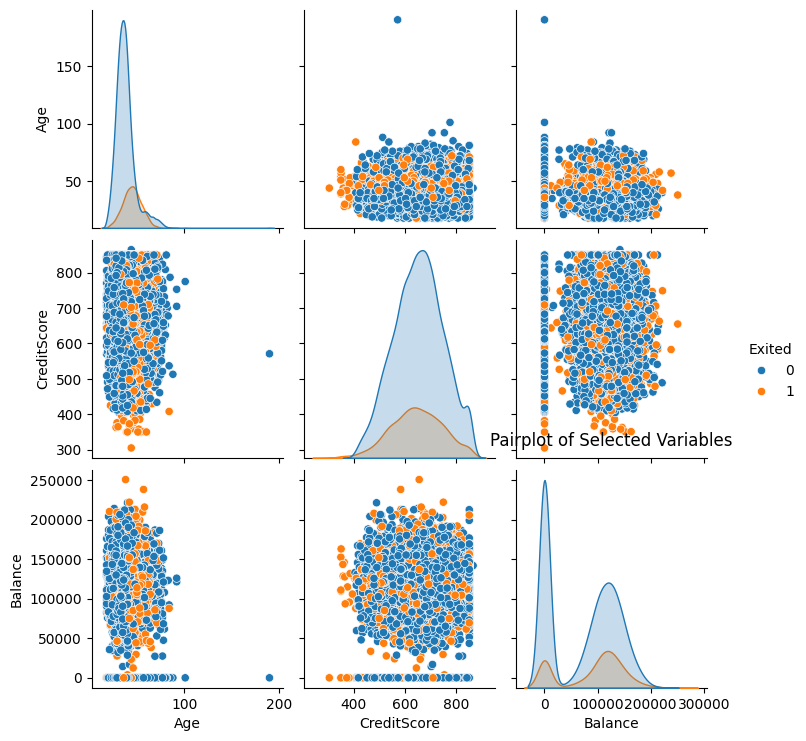

In [11]:
# Pairplot for a few selected variables
sns.pairplot(df[['Age', 'CreditScore', 'Balance', 'Exited']], hue='Exited')
plt.title('Pairplot of Selected Variables')
plt.show()

# Feature Engineering: Creating new features

In [12]:
# Interaction between balance and number of products
df['Balance_Products_Interaction'] = df['Balance'] * df['NumOfProducts']

# Age group based on the 'Age' to capture life stages
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 55, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

# Credit Score into categories
df['Credit_Category'] = pd.cut(df['CreditScore'], bins=[0, 580, 670, 740, 800, 850], labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# Feature indicating the overall engagement score (made-up example)
# We assume having a credit card and being an active member contribute to engagement
df['Engagement_Score'] = (df['HasCrCard'] + df['IsActiveMember']) * 0.5

# Feature Selection

In [13]:
# Identify features with high correlation to target

# First, ensure that you drop or convert non-numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=[np.number])  # This selects only the numeric columns

# Calculate correlation matrix only on numeric data
correlation = numeric_df.corr()
print("Feature Correlation with 'Exited':")
print(correlation['Exited'].sort_values(ascending=False))

# Optionally, if you want to convert some categorical data into numeric and include them in correlation:
# One-hot encode categorical variables and concatenate them with the numeric ones
categorical_columns = ['Geography', 'Gender']  # Add other categorical columns as needed
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
numeric_df = pd.concat([numeric_df, df_encoded], axis=1)

# Recalculate the correlation with the new numeric DataFrame that includes encoded categorical data
correlation = numeric_df.corr()
print("Updated Feature Correlation with 'Exited' including categorical variables:")
print(correlation['Exited'].sort_values(ascending=False))

Feature Correlation with 'Exited':
Exited                          1.000000
Age                             0.280904
Balance_Products_Interaction    0.133437
Balance                         0.118533
EstimatedSalary                 0.012097
CustomerId                     -0.006248
HasCrCard                      -0.007138
Tenure                         -0.012178
RowNumber                      -0.016571
CreditScore                    -0.027796
NumOfProducts                  -0.047820
Engagement_Score               -0.120882
IsActiveMember                 -0.156128
Name: Exited, dtype: float64
Updated Feature Correlation with 'Exited' including categorical variables:
Exited                          1.000000
Age                             0.280904
Geography_Germany               0.173488
Balance_Products_Interaction    0.133437
Balance                         0.118533
Gender_Neutral                  0.020817
EstimatedSalary                 0.012097
CustomerId                     -0.006248


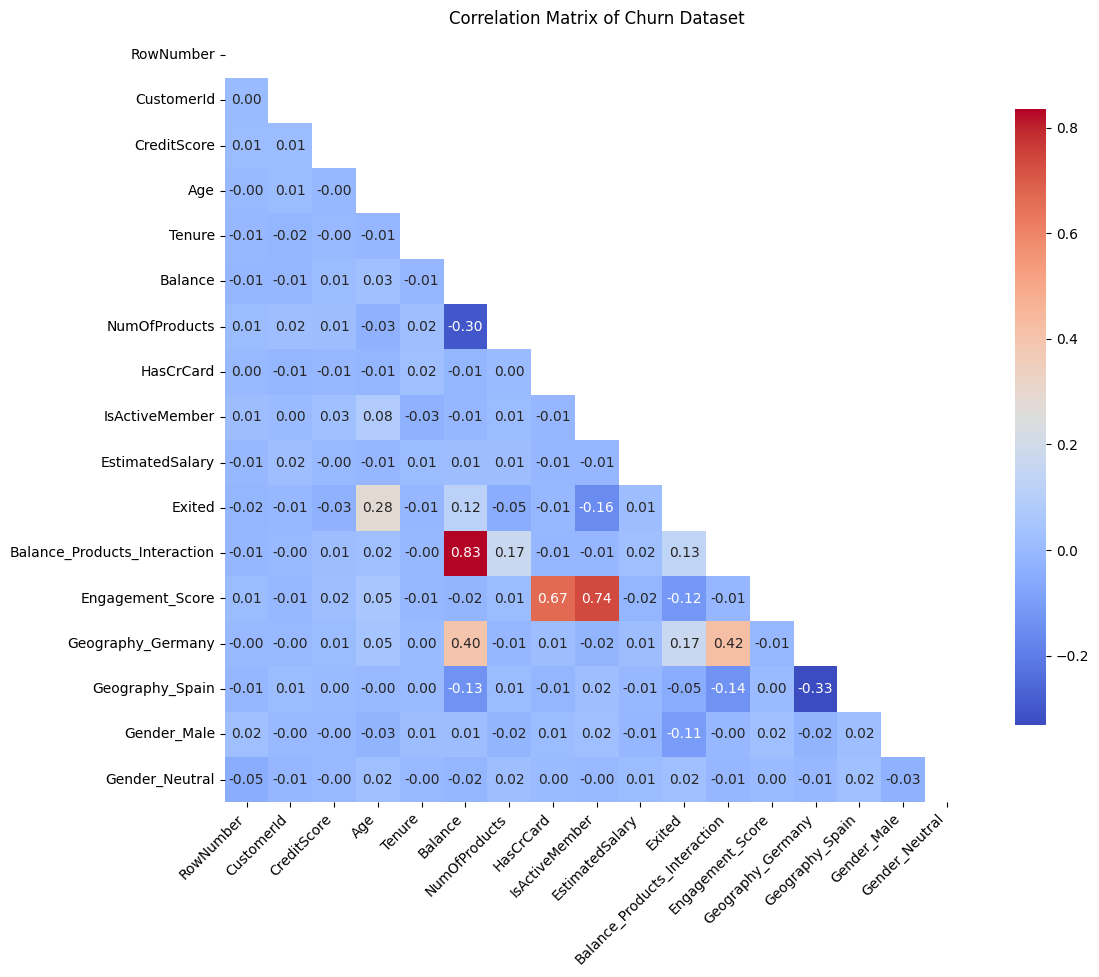

In [14]:
# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'shrink': .8})

# Add title and labels
plt.title('Correlation Matrix of Churn Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [15]:
# Dropping features with very low correlation
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)  # Assuming these are not relevant

# Handling categorical variables with one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Age_Group', 'Credit_Category'], drop_first=False)

# Check the first few rows to see new features
print(df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0   42       2       0.00              1          1   
1        608.0   41       1   83807.86              1          0   
2        502.0   42       8  159660.80              3          1   
3        699.0   39       1       0.00              2          0   
4        850.0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Balance_Products_Interaction  \
0               1        101348.88       1                          0.00   
1               1        112542.58       0                      83807.86   
2               0        113931.57       1                     478982.40   
3               0         93826.63       0                          0.00   
4               1         79084.10       0                     125510.82   

   Engagement_Score  Geography_France  Geography_Germany  Geography_Spain  \
0               1.0              True              False 

# Data Splitting

In [16]:
# df['Gender'].value_counts()
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Balance_Products_Interaction', 'Engagement_Score', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Gender_Neutral', 'Age_Group_Teen', 'Age_Group_Young Adult',
       'Age_Group_Adult', 'Age_Group_Senior', 'Credit_Category_Poor',
       'Credit_Category_Fair', 'Credit_Category_Good',
       'Credit_Category_Very Good', 'Credit_Category_Excellent'],
      dtype='object')

In [17]:
# Assuming df is your preprocessed DataFrame
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']               # Target variable

# Split data into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Split remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Validation set size: 1000 samples
Test set size: 1000 samples


# Model Development

In [18]:
# Assuming df is your preprocessed DataFrame
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']               # Target variable

# Data splitting
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
print(X.columns)
print(len(X.columns))
X

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Balance_Products_Interaction',
       'Engagement_Score', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Gender_Neutral',
       'Age_Group_Teen', 'Age_Group_Young Adult', 'Age_Group_Adult',
       'Age_Group_Senior', 'Credit_Category_Poor', 'Credit_Category_Fair',
       'Credit_Category_Good', 'Credit_Category_Very Good',
       'Credit_Category_Excellent'],
      dtype='object')
25


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Balance_Products_Interaction,Engagement_Score,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Gender_Neutral,Age_Group_Teen,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Senior,Credit_Category_Poor,Credit_Category_Fair,Credit_Category_Good,Credit_Category_Very Good,Credit_Category_Excellent
0,619.0,42,2,0.00,1,1,1,101348.88,0.00,1.0,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False
1,608.0,41,1,83807.86,1,0,1,112542.58,83807.86,0.5,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False
2,502.0,42,8,159660.80,3,1,0,113931.57,478982.40,0.5,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False
3,699.0,39,1,0.00,2,0,0,93826.63,0.00,0.0,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False
4,850.0,43,2,125510.82,1,1,1,79084.10,125510.82,1.0,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39,5,0.00,2,1,0,96270.64,0.00,0.5,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False
9996,516.0,35,10,57369.61,1,1,1,101699.77,57369.61,1.0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False
9997,709.0,36,7,0.00,1,0,1,42085.58,0.00,0.5,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False
9998,772.0,42,3,75075.31,2,1,0,92888.52,150150.62,0.5,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False


# Model Evaluation

In [20]:
# Predict on the test set
xgb_predictions = xgb_classifier.predict(X_test)
xgb_pred_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, xgb_predictions)
precision = precision_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)
roc_auc = roc_auc_score(y_test, xgb_pred_prob)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_predictions)
print("Confusion Matrix:")
print(cm)

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

Accuracy: 0.85
Precision: 0.70
Recall: 0.56
F1 Score: 0.62
ROC AUC Score: 0.86
Confusion Matrix:
[[734  51]
 [ 95 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       785
           1       0.70      0.56      0.62       215

    accuracy                           0.85      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.85      0.85      0.85      1000



In [21]:
# Save the model to a pickle file for later use
import pickle
with open('./pickles/cust_churn_xgb_clf.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)

# Strategy Development for Retention

Focusing on developing strategies for customer retention based on the insights gathered from the predictive model is crucial. The goal is to design interventions that address the underlying reasons for customer churn, leveraging the predictive power of your model to target these interventions effectively. Here’s how you can approach strategy development for customer retention:

### Step 7: Strategy Development for Retention

1. **Analyze Predictive Model Output**:
   - Identify key predictors of churn from the model, such as high correlations or features with high feature importance scores.
   - Analyze patterns in the data of customers who churned versus those who stayed, focusing on variables like geography, age, balance, product holdings, and activity levels.

2. **Segmentation**:
   - Segment customers based on risk of churn and other relevant characteristics identified in the model (e.g., age groups, balance ranges, product usage).
   - Create customer profiles for each segment to tailor retention strategies effectively.

3. **Targeted Retention Initiatives**:
   - **High-Risk Customers**: Implement proactive outreach programs, such as personalized emails or calls to offer support, discuss concerns, and provide tailored solutions or incentives.
   - **Medium-Risk Customers**: Engage with these customers through regular newsletters, updates on new products or services, and periodic reviews of their account to ensure satisfaction.
   - **Low-Risk Customers**: Continue to engage with general marketing and satisfaction measures but monitor for any changes that might increase their churn risk.

4. **Enhance Customer Experience**:
   - **Improve Service Delivery**: Address any service issues highlighted in the churn analysis, such as delays, errors, or lack of customization.
   - **Enhance Digital Experience**: Optimize online interfaces and mobile apps based on user feedback to ensure ease of use and access to necessary services.

5. **Loyalty Programs and Incentives**:
   - Develop or enhance loyalty programs that reward long-term customers with benefits that increase with tenure and/or usage.
   - Offer special promotions or discounts targeted at individuals showing signs of potential churn.

6. **Feedback Loops**:
   - Implement a system for collecting and analyzing customer feedback regularly to detect dissatisfaction early and adjust strategies as needed.
   - Use surveys, social media monitoring, and direct feedback during service interactions to gather comprehensive insights.

7. **Employee Training**:
   - Train customer-facing staff on new retention strategies and tools, ensuring they can identify at-risk customers and take appropriate action during interactions.
   - Focus on communication skills, problem-solving, and customer engagement techniques.

8. **Monitor and Evaluate**:
   - Set up KPIs (Key Performance Indicators) such as customer lifetime value, retention rate, and churn rate to monitor the effectiveness of implemented strategies.
   - Regularly review the impact of retention initiatives and adjust strategies based on what is most effective.


# Feedback Loop